In [2]:
import qiskit
from qiskit import quantum_info
from qiskit.execute_function import execute
from qiskit import BasicAer
import numpy as np
import pickle
import json
import os
from collections import Counter
from sklearn.metrics import mean_squared_error
from typing import Dict, List

#define utility functions

def simulate(circuit: qiskit.QuantumCircuit) -> dict:
    """Simulate the circuit, give the state vector as the result."""
    backend = BasicAer.get_backend('statevector_simulator')
    job = execute(circuit, backend)
    result = job.result()
    state_vector = result.get_statevector()
    
    histogram = dict()
    for i in range(len(state_vector)):
        population = abs(state_vector[i]) ** 2
        if population > 1e-9:
            histogram[i] = population
    
    return histogram


def histogram_to_category(histogram):
    """This function take a histogram representations of circuit execution results, and process into labels as described in 
    the problem description."""
    assert abs(sum(histogram.values())-1)<1e-8
    positive=0
    for key in histogram.keys():
        digits = bin(int(key))[2:].zfill(20)
        if digits[-1]=='0':
            positive+=histogram[key]
        
    return positive


def count_gates(circuit: qiskit.QuantumCircuit) -> Dict[int, int]:
    """Returns the number of gate operations with each number of qubits."""
    counter = Counter([len(gate[1]) for gate in circuit.data])
    #feel free to comment out the following two lines. But make sure you don't have k-qubit gates in your circuit
    #for k>2
    for i in range(2,20):
        assert counter[i]==0
        
    return counter

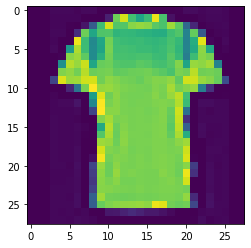

In [12]:
data_path='data'
#load the actual hackthon data (fashion-mnist)
images=np.load(data_path+'/images.npy')
labels=np.load(data_path+'/labels.npy')
#you can visualize it
import matplotlib.pyplot as plt
plt.imshow(images[1])

In [4]:
#your submission

# Functions 'encode' and 'decode' are dummy.
def encode(image):
      

# Open the picture prepared in advance
        
    imgmat = np.array(list(image.getdata(band=0)), float)
    imgmat.shape = (img.size[1], img.size[0])
    imgmat = np.matrix(imgmat)/255
        
#preprocessing - Dimensionality reduction
     
        

    image = image.reshape((28, 28))
    pca = PCA(n_components=8)
    reduced_image = pca.fit_transform(image)
    reduced_image = reduced_image.reshape((8, 8))    
        
        
        
        
# Convert the raw pixel values to probability amplitudes
    def amplitude_encode(img_data):
    
# Calculate the RMS value
        rms = np.sqrt(np.sum(np.sum(img_data**2, axis=1)))
    
# Create normalized image
        image_norm = []
        for arr in img_data:
            for ele in arr:
                image_norm.append(ele / rms)
        
# Return the normalized image as a numpy array
        return np.array(image_norm)

# Get the amplitude ancoded pixel values
# Horizontal: Original image
    image_norm_h = amplitude_encode(reduced_image)

# Vertical: Transpose of Original image
    image_norm_v = amplitude_encode(reduced_image.T)  
    
    
    
# Initialize some global variable for number of qubits
    data_qb = 6
    anc_qb = 1
    total_qb = data_qb + anc_qb

# Initialize the amplitude permutation unitary
    D2n_1 = np.roll(np.identity(2**total_qb), 1, axis=1)
    
# Create the circuit for horizontal scan
    qc_h = QuantumCircuit(total_qb)
    qc_h.initialize(image_norm_h, range(1, total_qb))
    qc_h.h(0)
    qc_h.unitary(D2n_1, range(total_qb))
    qc_h.h(0)
    display(qc_h.draw('mpl', fold=-1))

# Create the circuit for vertical scan
    qc_v = QuantumCircuit(total_qb)
    qc_v.initialize(image_norm_v, range(1, total_qb))
    qc_v.h(0)
    qc_v.unitary(D2n_1, range(total_qb))
    qc_v.h(0)
    

# Combine both circuits into a single list
    circ_list = [qc_h, qc_v]
        
        
    
    return qc_h

def decode(histogram):
    
    threshold = lambda amp: (amp > 1e-15 or amp < -1e-15)
    
    
    edge_scan_h = np.abs(np.array([1 if threshold(histogram.get(2*i+1).real) else 0 for i in range(2**6)])).reshape(8, 8)
    
    # Return matrix after retrieval (take 8x8 return back 28x28) @Abhihek or Rishabh
    
    image = pca.inverse_transform(edge_scan_h)
    image= original_image.reshape((28, 28))
   
    return matrix

def run_part1(image):
    #encode image into a circuit
    circuit=encode(image)

    #simulate circuit
    histogram=simulate(circuit)

    #reconstruct the image
    image_re=decode(histogram)

    return circuit,image_re

def run_part2(image):
    # load the quantum classifier circuit
     # a. Use encode(image) to convert the image into a quantum circuit
    qr = qiskit.QuantumRegister(8) # 8 qubits to represent the 8x8 image
    circuit = qiskit.QuantumCircuit(qr)
    # Add gates to the circuit to implement the classifier logic
    circuit.h(qr[0])
    circuit.cx(qr[0], qr[1])
    circuit.cx(qr[1], qr[2])

    # Save the circuit to a .pickle file
    with open("quantum_classifier.pickle", "wb") as file:
        pickle.dump(circuit, file)


    
    en_image = encode(image)
    
    # b. Append the circuit with the classifier circuit loaded from the .pickle file
    with open("quantum_classifier.pickle", "rb") as file:
        classifier_circuit = pickle.load(file)
        
    #circuit = encoded_image + classifier_circuit
    circuit = en_image.compose(classifier_circuit)
    
    # c. Simulate the circuit (encoded_image+classifier_circuit) and get a histogram
    backend = qiskit.BasicAer.get_backend("qasm_simulator")
    result = qiskit.execute(circuit, backend, shots=1024).result()
    ob1 = assemble(circuit)
    res = backend.run(ob1).result()
    
    #simulate circuit
    histogram=simulate(qc)
        
    #convert histogram to category
    label=histogram_to_category(histogram)
    
    #thresholding the label, any way you want
    if label>0.5:
        label=1
    else:
        label=0
        
    return circuit,label




In [14]:
#how we grade your submission

score=0
gatecount=0
n=len(images)

for i in range(n):
    #run part 2
    circuit,label=run_part2(images[i])
    

    
    #count the gate used in the circuit for score calculation
    gatecount+=count_gates(circuit)[2]
    
    #check label
    if label==labels[i]:
        score+=1
#score
score=score/n
gatecount=gatecount/n

print(score*(0.999**gatecount))

AttributeError: 'numpy.ndarray' object has no attribute 'getdata'

In [28]:
import numpy as np
import pickle
from collections import Counter
from sklearn.metrics import mean_squared_error
import qiskit
from typing import Union
import torch.nn.functional as F
import torch
import torch.optim as optim
import torch.nn as nn


import torch.autograd

def encode(image: np.ndarray) -> qiskit.QuantumCircuit:
    circuit = qiskit.QuantumCircuit(NB_QUBITS)

    # Get the theta values for each pixel
    image = image.flatten()
    thetas = [pixel_value_to_theta(pixel) for pixel in image]
    thetas += [0] * (NB_PX - NB_PX_IMG)


    for i in range(NB_QUBITS - 1):
        circuit.h(i)
    circuit.barrier()

    ry_qbits = list(range(NB_QUBITS))

   
    switches = [bin(0)[2:].zfill(NB_QUBITS - 1)] + [
        bin(i ^ (i - 1))[2:].zfill(NB_QUBITS - 1) for i in range(1, NB_PX)
    ]



   
    prev_switch = switches[0]
    for i in range(NB_PX):
        theta = thetas[i] # pixel_value_to_theta(intensity_count_expression[i][0])
        
        # do not do zero rotation
        if theta != 0:
            switch = np.binary_repr(i, NB_QUBITS - 1)

            # Apply x gate to the i-th qubit if the i-th bit of the switch is 1
            for j in range(NB_QUBITS - 1):
                if switch[j] != prev_switch[j]:
                    circuit.x(j)
                # if switch[j] == "1":
                #     circuit.x(j - 1)
            prev_switch = switch

          
            circuit.append(c3ry, ry_qbits)

            recursive_ry(circuit, 2*theta, np.array([1]*(NB_QUBITS - 1)))

            circuit.barrier()

    # check all qbits are at 1 for the measurements
    for j in range(NB_QUBITS - 1):
        if prev_switch[j] != "1":
            circuit.x(j)

    circuit.measure_all()
    return circuit

def simulator(circuit: qiskit.QuantumCircuit) -> dict:
    # Simulate the circuit
    aer_sim = Aer.get_backend("aer_simulator")
    t_qc = transpile(circuit, aer_sim)
    qobj = assemble(t_qc, shots=1024)

    result = aer_sim.run(qobj).result()
    return result.get_counts(circuit)



def histogram_to_category(histogram: dict) -> int:
    return 1
def load_qasm(path: str) -> qiskit.QuantumCircuit:
    with open(path, 'r') as f:
        qasm=f.read()
    return qiskit.QuantumCircuit.from_qasm_str(qasm)


def split_train_test_data(images: np.ndarray, labels: np.ndarray, train_ratio: float=0.8) -> Union[np.ndarray, np.ndarray, np.ndarray, np.ndarray]:
    nb_train = int(len(images)*train_ratio)
    train_images = images[:nb_train]
    train_labels = labels[:nb_train]
    test_images = images[nb_train:]
    test_labels = labels[nb_train:]
    return train_images, train_labels, test_images, test_labels
class QuantumCircuit:
    def __init__(self, circuit: qiskit.QuantumCircuit, backend=qiskit.Aer.get_backend("aer_simulator"), shots: int = 1024): #TODO Typing
        # This circuit will be parametrised by the weights of a upstream NN
        self.circuit = circuit
        self.theta = qiskit.circuit.Parameter('theta')
        self.backend = backend
        self.shots = shots
    
    def simulate(self, weights: np.ndarray) -> dict:
        t_qc = qiskit.transpile(self.circuit, self.backend)
        qobj = qiskit.assemble(t_qc, shots=self.shots, parameter_binds = [{self.theta: weight} for weight in weights])
        job = self.backend.run(qobj)
        result = job.result().get_counts(self.circuit)
        
        counts = np.array(list(result.values()))
        states = np.array(list(result.keys())).astype(float)
                
        return result

class ClassicalNet(nn.Module):
    def __init__(self):
        super(ClassicalNet, self).__init__()
        # TODO: Replace with better architecture
        self.conv1 = nn.Conv2d(1, 6, kernel_size=5)
        self.conv2 = nn.Conv2d(6, 16, kernel_size=5)
        self.dropout = nn.Dropout2d()
        self.fc1 = nn.Linear(256, 64)
        self.fc2 = nn.Linear(64, 1)

    def forward(self, x: torch.Tensor) -> torch.Tensor:
        x = F.relu(self.conv1(x))
        x = F.max_pool2d(x, 2)
        x = F.relu(self.conv2(x))
        x = F.max_pool2d(x, 2)
        x = self.dropout(x)
        x = x.view(1, -1)
        x = F.relu(self.fc1(x))
        x = self.fc2(x)
        return x

class QuantumFunctions(torch.autograd.Function):
    @staticmethod
    def forward(ctx, circuit: qiskit.QuantumCircuit, x: torch.Tensor, shift) -> torch.Tensor:
        ctx.quantum_circuit = circuit
        ctx.shift = shift

        sim = ctx.quantum_circuit.simulate(x)
        y = torch.tensor([sim])
        ctx.save_for_backward(x)
        
        return x

    @staticmethod
    def backward(ctx, grad_output: torch.Tensor) -> Union[torch.Tensor, None]:
        x = ctx.saved_tensors
        x = x.detach().numpy()
        
        # Gradient evaluation with finite differences
        shift_right = x + ctx.shift * np.ones(x.shape)
        shift_left = x - ctx.shift * np.ones(x.shape)

        gradients = []
        for i in range(len(x)):
            y_right = ctx.quantum_circuit.simulate(shift_right[i])
            y_left = ctx.quantum_circuit.simulate(shift_left[i])

            gradient = torch.Tensor([(y_right - y_left) / (2 * ctx.shift)])
            gradients.append(gradient)
        gradients = np.array(gradients).T
        return grad_output.float() * torch.tensor([gradients]).float(), None
        

class QuantumNet(nn.Module):
    def __init__(self, quantum_circuit: QuantumCircuit, shift) -> None:
        super(QuantumNet, self).__init__()
        self.quantum_circuit = quantum_circuit
        self.shift = shift

    def forward(self, x):
        return QuantumFunctions.apply(x, self.quantum_circuit, self.shift)

class HybridClassifier(nn.Module):
    def __init__(self, quantum_net: ClassicalNet, classical_net: QuantumNet) -> None:
        super(HybridClassifier, self).__init__()
        self.classical_net = classical_net
        self.quantum_net = quantum_net
    
    def forward(self, x: torch.Tensor) -> torch.Tensor:
        x = self.classical_net(x)
        x = self.quantum_net(x)
        return x

def test_classifier(test_images: np.ndarray, test_labels: np.ndarray, classifier: qiskit.QuantumCircuit) -> Union[list, float]:
    nb_test = len(test_images)
    predictions = []
    for i in range(nb_test):
        image = test_images[i]
        _, prediction = run_part2(classifier, image)
        predictions.append(prediction)
    return predictions, mean_squared_error(test_labels, predictions)

def run_part2(pickle_path: str, image: np.ndarray) -> Union[qiskit.QuantumCircuit, int]:
    with open(pickle_path, 'rb') as f:
        classifier=pickle.load(f)
        circuit = encode(image)
        circuit.append(classifier)
        histogram = simulator(circuit)
        label = histogram_to_category(histogram)
    return circuit, label
if __name__ == "__main__":
    images = np.load('data/images.npy')
    labels = np.load('data/labels.npy')
    train_images, train_labels, test_images, test_labels = split_train_test_data(images, labels)

classifier = pickle.load('quantum_classifier_5qbits.pickle') # To be integrated to a classical NN
print(classifier)

TypeError: file must have 'read' and 'readline' attributes

In [38]:
import numpy as np
import pickle
from collections import Counter
from sklearn.metrics import mean_squared_error
import qiskit
from typing import Union

import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim

import torch.autograd


def encode(image: np.ndarray) -> qiskit.QuantumCircuit:
    circuit = qiskit.QuantumCircuit(NB_QUBITS)

    # Get the theta values for each pixel
    image = image.flatten()
    thetas = [pixel_value_to_theta(pixel) for pixel in image]
    thetas += [0] * (NB_PX - NB_PX_IMG)

    # Apply Hadamard gates for all qubits except the last one
    for i in range(NB_QUBITS - 1):
        circuit.h(i)
    #circuit.barrier()

    ry_qbits = list(range(NB_QUBITS))

    # Switch is no longer relevant written this way: instead, we should apply the X gates according to
    # the result of process_image (see above)
    # intensity_count_expression = process_image(image)
    # switches = [ice[2][i] ^ ice[2][i-1] for i in range(intensity_count_expression)]
    # This also means that an optimisation has to be done to minimise the number of X gates applied 
    # (XOR yielding minimal number of 1s)
    switches = [bin(0)[2:].zfill(NB_QUBITS - 1)] + [
        bin(i ^ (i - 1))[2:].zfill(NB_QUBITS - 1) for i in range(1, NB_PX)
    ]

 

    # Apply the rotation gates
    prev_switch = switches[0]
    for i in range(NB_PX):
        theta = thetas[i] # pixel_value_to_theta(intensity_count_expression[i][0])
        
        # do not do zero rotation
        if theta != 0:
            switch = np.binary_repr(i, NB_QUBITS - 1)

            # Apply x gate to the i-th qubit if the i-th bit of the switch is 1
            for j in range(NB_QUBITS - 1):
                if switch[j] != prev_switch[j]:
                    circuit.x(j)
                # if switch[j] == "1":
                #     circuit.x(j - 1)
            prev_switch = switch

            

            # TODO: Not a 2-qubit gate: reformulate using 2-qubit gates only (RYGate + CNOT)
            # Instead of 2 * theta, rotation is 2 * count * theta
            # where count is stored in intensity_count_expression[1]
            # where theta is result of pixel_value_to_theta(intensity_count_expression[0])
            # When simplified expression, control is only on the number of qubits not equal to 2 or - (do not care)
            c3ry = RYGate(2 * theta).control(NB_QUBITS - 1) # intensity_count_expression[i][1] * 2 * theta
            # In this case, ry_qbits is the position of the qubits not equal to 2 or - (do not care)
            circuit.append(c3ry, ry_qbits)

            recursive_ry(circuit, 2*theta, np.array([1]*(NB_QUBITS - 1)))

            #circuit.barrier()

    # check all qbits are at 1 for the measurements
    for j in range(NB_QUBITS - 1):
        if prev_switch[j] != "1":
            circuit.x(j)

    circuit.measure_all()
    return circuit

def simulator(circuit: qiskit.QuantumCircuit) -> dict:
    # Simulate the circuit
    aer_sim = Aer.get_backend("aer_simulator")
    t_qc = transpile(circuit, aer_sim)
    qobj = assemble(t_qc, shots=1024)

    result = aer_sim.run(qobj).result()
    return result.get_counts(circuit)


def histogram_to_category(histogram: dict) -> int:
    return 1

def histogram_to_category(histogram: dict) -> int:
    assert abs(sum(histogram.values())-1)<1e-8
    positive=0
    for key in histogram.keys():
        digits = bin(int(key))[2:].zfill(20)
        if digits[-1]=='0':
            positive+=histogram[key]
    # return positive


def load_qasm(path: str) -> qiskit.QuantumCircuit:
    with open(path, 'r') as f:
        qasm=f.read()
    return qiskit.QuantumCircuit.from_qasm_str(qasm)


def split_train_test_data(images: np.ndarray, labels: np.ndarray, train_ratio: float=0.8) -> Union[np.ndarray, np.ndarray, np.ndarray, np.ndarray]:
    nb_train = int(len(images)*train_ratio)
    train_images = images[:nb_train]
    train_labels = labels[:nb_train]
    test_images = images[nb_train:]
    test_labels = labels[nb_train:]
    return train_images, train_labels, test_images, test_labels

## Classes for the Hybrid (classical + quantum) Classifier [HC]

# General idea :
# The HC is made of three parts:
#   - A classical neural network whose architecture is defined in the ClassicalNet class
#   - A quantum circuit whose architecture is defined in the QuantumNet class
#   The Quantum Net is parametrised by the weights of the Classical Net
# We also need a forward function that will take the input of the classical net and pass it to the quantum net
# The HybridClassifier class will be the one gluing all the parts together. It will be the one we will train and use to make predictions
class QuantumCircuit:
    def __init__(self, circuit: qiskit.QuantumCircuit, backend=qiskit.Aer.get_backend("aer_simulator"), shots: int = 1024): #TODO Typing
        # This circuit will be parametrised by the weights of a upstream NN
        self.circuit = circuit
        self.theta = qiskit.circuit.Parameter('theta')
        self.backend = backend
        self.shots = shots
    
    def simulate(self, weights: np.ndarray) -> dict:
        t_qc = qiskit.transpile(self.circuit, self.backend)
        qobj = qiskit.assemble(t_qc, shots=self.shots, parameter_binds = [{self.theta: weight} for weight in weights])
        job = self.backend.run(qobj)
        result = job.result().get_counts(self.circuit)
        
        counts = np.array(list(result.values()))
        states = np.array(list(result.keys())).astype(float)
                
        return result


class ClassicalNet(nn.Module):
    def __init__(self):
        super(ClassicalNet, self).__init__()
        
        self.conv1 = nn.Conv2d(1, 6, kernel_size=5)
        self.conv2 = nn.Conv2d(6, 16, kernel_size=5)
        self.dropout = nn.Dropout2d()
        self.fc1 = nn.Linear(256, 64)
        self.fc2 = nn.Linear(64, 1)

    def forward(self, x: torch.Tensor) -> torch.Tensor:
        x = F.relu(self.conv1(x))
        x = F.max_pool2d(x, 2)
        x = F.relu(self.conv2(x))
        x = F.max_pool2d(x, 2)
        x = self.dropout(x)
        x = x.view(1, -1)
        x = F.relu(self.fc1(x))
        x = self.fc2(x)
        return x


class QuantumFunctions(torch.autograd.Function):
    @staticmethod
    def forward(ctx, circuit: qiskit.QuantumCircuit, x: torch.Tensor, shift) -> torch.Tensor:
        ctx.quantum_circuit = circuit
        ctx.shift = shift

        sim = ctx.quantum_circuit.simulate(x)
        y = torch.tensor([sim])
        ctx.save_for_backward(x)
        
        return x

    @staticmethod
    def backward(ctx, grad_output: torch.Tensor) -> Union[torch.Tensor, None]:
        x = ctx.saved_tensors
        x = x.detach().numpy()
        
        # Gradient evaluation with finite differences
        shift_right = x + ctx.shift * np.ones(x.shape)
        shift_left = x - ctx.shift * np.ones(x.shape)

        gradients = []
        for i in range(len(x)):
            y_right = ctx.quantum_circuit.simulate(shift_right[i])
            y_left = ctx.quantum_circuit.simulate(shift_left[i])

            gradient = torch.Tensor([(y_right - y_left) / (2 * ctx.shift)])
            gradients.append(gradient)
        gradients = np.array(gradients).T
        return grad_output.float() * torch.tensor([gradients]).float(), None
        

class QuantumNet(nn.Module):
    def __init__(self, quantum_circuit: QuantumCircuit, shift) -> None:
        super(QuantumNet, self).__init__()
        self.quantum_circuit = quantum_circuit
        self.shift = shift

    def forward(self, x):
        return QuantumFunctions.apply(x, self.quantum_circuit, self.shift)


class HybridClassifier(nn.Module):
    def __init__(self, quantum_net: ClassicalNet, classical_net: QuantumNet) -> None:
        super(HybridClassifier, self).__init__()
        self.classical_net = classical_net
        self.quantum_net = quantum_net
    
    def forward(self, x: torch.Tensor) -> torch.Tensor:
        x = self.classical_net(x)
        x = self.quantum_net(x)
        # Unsure about the return?
        return x


def test_classifier(test_images: np.ndarray, test_labels: np.ndarray, classifier: qiskit.QuantumCircuit) -> Union[list, float]:
    nb_test = len(test_images)
    predictions = []
    for i in range(nb_test):
        image = test_images[i]
        _, prediction = run_part2(classifier, image)
        predictions.append(prediction)
    return predictions, mean_squared_error(test_labels, predictions)


def run_part2(pickle_path: str, image: np.ndarray) -> Union[qiskit.QuantumCircuit, int]:
    # Load the quantum classifier circuit
    with open(pickle_path, 'rb') as f:
        classifier=pickle.load(f)
    
    # Build circuit
    circuit = encode(image)
    circuit.append(classifier) ##
    
    # Simulate circuit
    histogram = simulator(circuit)
        
    # Convert histogram to category
    label = histogram_to_category(histogram)
    return circuit, label


if __name__ == "__main__":
    images = np.load('data/images.npy')
    labels = np.load('data/labels.npy')
    train_images, train_labels, test_images, test_labels = split_train_test_data(images, labels)

    # classifier = load_qasm('part2.qasm') # To be integrated to a classical NN
    # print(classifier)